In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.25, random_state=0)

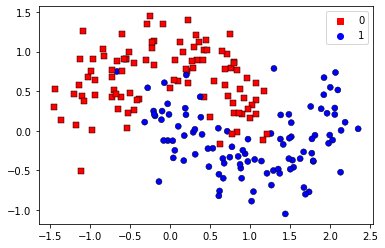

In [27]:
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.savefig('moons_data.pdf')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [6]:
print('Accuracy on training set:', adaboost.score(X_train, y_train))
print('Accuracy on test set:', adaboost.score(X_test, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.96


In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, feature_names, title, h=0.02):  
    colors = ['r', 'b']
    cmap = ListedColormap(colors)
      
    # Assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    
    # Plot also the sample points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, palette=colors, 
                    markers=('s', 'o'), edgecolor='black')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()

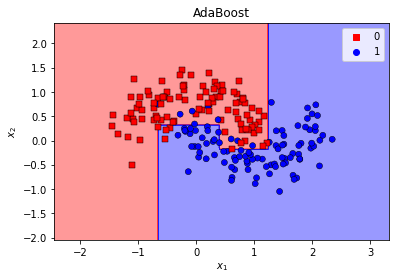

In [26]:
feature_names = ['$x_1$', '$x_2$']
plot_decision_boundaries(adaboost, X, y, feature_names, title='AdaBoost')

plt.savefig('AdaboostMoons.pdf')